# Grupo The BlackTeam #

### Integrantes:
* Mario Agustin Sgro
* Juan Manuel Villarreal
* Marcelo Leon

#### En este Notebook se probarán las opciones de Regresión Logística y DSG

In [182]:
#Librerías...
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import SGDClassifier

from sklearn import preprocessing

from ml.visualization import plot_confusion_matrix

#------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [183]:
#Importo datos
dtset_tst=pd.read_csv('./data/test.csv')
dtset_trn=pd.read_csv('./data/train.csv')
dtset_breed=pd.read_csv('./data/breed_labels.csv')
dtset_color=pd.read_csv('./data/color_labels.csv')
dtset_state=pd.read_csv('./data/state_labels.csv')

In [184]:
print('Infor provista: test.csv')
print(' --Filas:',dtset_tst.shape[0])
print(' --Cols :',dtset_tst.shape[1])
print('Atributos:', dtset_tst.columns)

Infor provista: test.csv
 --Filas: 4411
 --Cols : 19
Atributos: Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'PID'],
      dtype='object')


In [185]:
dtset_tst.sample(5)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,PID
326,1,1,218,307,2,1,2,0,2,2,1,3,2,1,1,0,41326,Lovely puppy looking for a home sweet home. Co...,1103
885,2,1,292,0,2,2,6,7,1,2,2,2,2,1,1,0,41324,"Icy Blue eyes, Siamese breed cat looking for f...",2956
3821,1,2,307,0,2,5,0,0,2,1,1,1,1,1,1,0,41326,Kindly give this pup a place called home 🏡 and...,13043
1892,1,7,307,0,2,1,2,7,2,2,2,1,2,1,2,0,41326,"hello, saya ingin mencari adopter atau fostere...",6434
2651,1,48,205,307,1,5,0,0,1,2,1,1,1,1,1,0,41401,Billy is a mixed shih tzu..He's sorta like a l...,9192


In [186]:
print('Infor provista: breed_labels.csv')
print(' --Filas:',dtset_breed.shape[0])
print(' --Cols :',dtset_breed.shape[1])
print('Atributos:', dtset_breed.columns)

Infor provista: breed_labels.csv
 --Filas: 307
 --Cols : 3
Atributos: Index(['BreedID', 'Type', 'BreedName'], dtype='object')


In [187]:
dtset_breed.sample(5)

,BreedID,Type,BreedName
82,83,1,English Cocker Spaniel
264,264,2,Domestic Long Hair
4,5,1,Akita
262,262,2,Dilute Calico
291,291,2,Selkirk Rex


In [188]:
print('Infor provista: color_labels.csv')
print(' --Filas:',dtset_color.shape[0])
print(' --Cols :',dtset_color.shape[1])
print('Atributos:', dtset_color.columns)

Infor provista: color_labels.csv
 --Filas: 7
 --Cols : 2
Atributos: Index(['ColorID', 'ColorName'], dtype='object')


In [189]:
dtset_color.sample(5)

,ColorID,ColorName
6,7,White
3,4,Yellow
2,3,Golden
1,2,Brown
4,5,Cream


In [190]:
print('Infor provista: state_labels.csv')
print(' --Filas:',dtset_state.shape[0])
print(' --Cols :',dtset_state.shape[1])
print('Atributos:', dtset_state.columns)

Infor provista: state_labels.csv
 --Filas: 15
 --Cols : 2
Atributos: Index(['StateID', 'StateName'], dtype='object')


In [191]:
dtset_state.sample(5)

,StateID,StateName
6,41332,Negeri Sembilan
11,41345,Sabah
10,41327,Pulau Pinang
1,41325,Kedah
9,41380,Perlis


In [192]:
print('Infor provista: train.csv')
print(' --Filas:',dtset_trn.shape[0])
print(' --Cols :',dtset_trn.shape[1])
print('Atributos:', dtset_trn.columns)

Infor provista: train.csv
 --Filas: 10582
 --Cols : 20
Atributos: Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'AdoptionSpeed', 'PID'],
      dtype='object')


In [193]:
dtset_trn.sample(5)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
4513,1,4,307,0,2,2,4,0,2,1,1,1,1,1,2,0,41401,2 adorable female 4-months old puppies up for ...,2,6389
4980,2,4,265,0,2,1,3,4,2,2,2,2,2,1,1,0,41401,Nomi was found hungry and alone on a rainy nig...,1,7057
8395,1,48,307,307,1,5,7,0,1,3,1,1,3,1,2,0,41401,I bought 1 of them and the other is their chil...,4,11869
2204,1,4,307,109,1,3,0,0,2,2,1,2,1,1,1,0,41326,Roy is really friendly he wants a home to take...,4,3151
2737,2,3,266,292,3,7,0,0,2,1,1,1,2,1,2,0,41401,"Hi, we found this two abandoned by the mother ...",4,3896


In [194]:
dtset_trn.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,1.454734,10.520412,265.469854,74.388868,1.779059,2.230675,3.236912,1.856738,1.860518,1.460971,1.729730,1.566528,1.912115,1.036666,1.584011,20.809960,41345.994613,2.518900,7477.025799
std,0.497970,18.374027,60.121490,123.434010,0.684763,1.743985,2.748595,2.974465,0.547535,0.593843,0.670791,0.701482,0.564041,0.198228,1.488348,78.397243,32.409109,1.176018,4310.921553
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,3768.250000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,7473.500000
75%,2.000000,12.000000,307.000000,188.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,4.000000,11200.750000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,4.000000,14992.000000


# Datos con que contamos:

#Type - Tipo de mascota (1 = Dog, 2 = Cat)
#Age - Edad en meses
#Breed1 - Raza primaria (Refer to BreedLabels dictionary)
#Breed2 - Raza secundaria, si es cruce (Refer to BreedLabels dictionary)
#Gender - Genero (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
#Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
#Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
#Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
#MaturitySize - Tamaño (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
#FurLength - Largo del pelaje (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
#Vaccinated - Si fue vacunado (1 = Yes, 2 = No, 3 = Not Sure)
#Dewormed - Si fue desparasitado (1 = Yes, 2 = No, 3 = Not Sure)
#Sterilized - Si fue esterilizado/castrado (1 = Yes, 2 = No, 3 = Not Sure)
#Health - Estado de salud (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
#Quantity - Cantidad de mascotas en el perfil
#Fee - Adoption fee (0 = Free)
#State - Estado in Malaysia (Refer to StateLabels dictionary)
#Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

#Variable objetivo:
#AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict.
0. Pet was adopted on the same day as it was listed. 
1. Pet was adopted between 1 and 7 days (1st week) after being listed. 
2. Pet was adopted between 8 and 30 days (1st month) after being listed. 
3. Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. 
4. No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).


In [195]:
#Separo los datos para entrenamiento y test
X = dtset_trn[ ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State']]
y = dtset_trn.AdoptionSpeed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [196]:
#Verifico separación
print(dtset_trn.shape)
print(X.shape)
print(y.shape)
print('...')
print(X_train.shape)
print(y_train.shape)
print('...')
print(X_test.shape)
print(y_test.shape)

(10582, 20)
(10582, 17)
(10582,)
...
(7407, 17)
(7407,)
...
(3175, 17)
(3175,)


In [200]:
def mostrar(obs, md, trn, y_trn, tst, y_tst):
    y_trn_pred = md.predict(trn)
    y_tst_pred  = md.predict(tst)

    print(obs)
    print('Exactitud para TRAIN: %.4f' % accuracy_score(y_trn, y_trn_pred))
    print('Exactitud para TEST : %.4f' % accuracy_score(y_tst, y_tst_pred))

### Regresión Logística

In [198]:
#Pruebo Regresion Logistica con los datos en Crudo 
modeloLR = LogisticRegressionCV(random_state=5,  multi_class='ovr')
modeloLR.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=None, penalty='l2', random_state=5,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [201]:
mostrar('Datos ORIGINALES', modeloLR, X_train, y_train, X_test, y_test)

Datos ORIGINALES
Exactitud para TRAIN: 0.3294
Exactitud para TEST : 0.3298


In [202]:
#Vemos que pasa Estandarizando y Normalizando
sST=StandardScaler()
X_train_ST=sST.fit_transform(X_train)

sMM=MinMaxScaler()
X_train_MM=sMM.fit_transform(X_train)

In [203]:
#Probamos datos Normalizados
modeloLR = LogisticRegressionCV(random_state=5,  multi_class='ovr')
modeloLR.fit(X_train_MM, y_train)

mostrar('Datos NORMALIZADOS', modeloLR, X_train_MM, y_train, sMM.transform(X_test), y_test)

Datos NORMALIZADOS
Exactitud para TRAIN: 0.3328
Exactitud para TEST : 0.3326


In [204]:
#>> MEJORES RESULTADOS
#Probamos datos Estandarizados
modeloLR = LogisticRegressionCV(random_state=5,  multi_class='ovr')
modeloLR.fit(X_train_ST, y_train)

mostrar('Datos ESTANDARIZADOS', modeloLR, X_train_ST, y_train, sST.transform(X_test), y_test)

Datos ESTANDARIZADOS
Exactitud para TRAIN: 0.3377
Exactitud para TEST : 0.3354


In [155]:
#Buscamos optimizar parámetros - Consideramos Datos Estandarizados
exploring_params = {
    'penalty': ['l2'], 
    'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'multi_class' : ['ovr', 'multinomial', 'auto']
}

modeloLR = LogisticRegression(random_state=5)
mBsqda = GridSearchCV(modeloLR, exploring_params, cv=5, scoring='accuracy')
mBsqda.fit(X_train_ST, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'multi_class': ['ovr', 'multinomial', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [205]:
print("Mejor conjunto de parámetros:")
print(mBsqda.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = mBsqda.cv_results_['mean_test_score']
stds = mBsqda.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, mBsqda.cv_results_['params']):
    if mean > 0.336:
        print("Exactitud: %0.5f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
print()

Mejor conjunto de parámetros:
{'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}

Puntajes de la grilla:

Exactitud: 0.33657 (+/-0.000) para los parámetros {'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
Exactitud: 0.33657 (+/-0.000) para los parámetros {'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}
Exactitud: 0.33657 (+/-0.000) para los parámetros {'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'sag'}
Exactitud: 0.33657 (+/-0.000) para los parámetros {'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'saga'}



In [206]:
#Entrenamos con los parámetros optimizados
modeloLR = LogisticRegressionCV(random_state=5, **mBsqda.best_params_)
modeloLR.fit(X_train_ST, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=None, penalty='l2', random_state=5,
           refit=True, scoring=None, solver='newton-cg', tol=0.0001,
           verbose=0)

In [207]:
#No se logró mejorar mucho
mostrar('Datos ESTANDARIZADOS', modeloLR, X_train_ST, y_train, sST.transform(X_test), y_test)

Datos ESTANDARIZADOS
Exactitud para TRAIN: 0.3375
Exactitud para TEST : 0.3354


#### Convertimos atributos y revisamos los datos

In [208]:
#Conversores
lbBreed = preprocessing.LabelBinarizer()
lbColor = preprocessing.LabelBinarizer()
lbGender = preprocessing.LabelBinarizer()
lbMaturitySize = preprocessing.LabelBinarizer() 
lbFurLength = preprocessing.LabelBinarizer()
lbVaccinated = preprocessing.LabelBinarizer()
lbDewormed = preprocessing.LabelBinarizer()
lbSterilized = preprocessing.LabelBinarizer()
lbHealth = preprocessing.LabelBinarizer()
lbState = preprocessing.LabelBinarizer()
lblWords = preprocessing.LabelBinarizer()

lbBreed.fit(dtset_trn.Breed1)
lbColor.fit(dtset_color.ColorID)

lbGender.fit(dtset_trn.Gender)
lbMaturitySize.fit(dtset_trn.MaturitySize)
lbFurLength.fit(dtset_trn.FurLength)
lbVaccinated.fit(dtset_trn.Vaccinated)
lbDewormed.fit(dtset_trn.Dewormed)
lbSterilized.fit(dtset_trn.Sterilized)
lbHealth.fit(dtset_trn.Health)

lbState.fit(dtset_state.StateID)

lWords=['0-20', '20-40', '40-60','60-100','100-200','>200']
lblWords.fit(lWords)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [209]:
#Fuciones de COnversión
def trnsCol(dt, lb, col, newcols):
    r=lb.transform(dt[col].tolist())
    c=[col + str(x) for x in lb.classes_ ]
    dt[c]= pd.DataFrame(r,columns=c, index=dt.index)
    newcols.extend(c)

def transformar(dt):
    dtset=dt.copy()
    cols=[]
    
    trnsCol(dtset, lbBreed, 'Breed1', cols)
    trnsCol(dtset, lbBreed, 'Breed2', cols)
    col='Breed_Pure'  #Agrego un nuevo atributo que define si es de Pura Raza
    dtset[col]=np.where(dtset.Breed2==0,1,0)
    cols.append(col)

    trnsCol(dtset, lbGender, 'Gender', cols)
    
    trnsCol(dtset, lbColor, 'Color1', cols)
    trnsCol(dtset, lbColor, 'Color2', cols)
    trnsCol(dtset, lbColor, 'Color3', cols)
    col='Color_Pure'  #Agrego un nuevo atributo que define si tiene un único color
    dtset[col]=np.where((dtset.Color2==0) & (dtset.Color3==0),1,0)    
    cols.append(col)
    
    trnsCol(dtset, lbMaturitySize, 'MaturitySize', cols)
    trnsCol(dtset, lbFurLength, 'FurLength', cols)
    trnsCol(dtset, lbVaccinated, 'Vaccinated', cols)
    trnsCol(dtset, lbDewormed, 'Dewormed', cols)
    trnsCol(dtset, lbSterilized, 'Sterilized', cols)
    trnsCol(dtset, lbHealth, 'Health', cols)

    trnsCol(dtset, lbState, 'State', cols)
    
    col='Free' #Defino un nuevo atributo que indique si el Gratis, vamos a descartar el FEE
    dtset[col]=np.where(dtset.Fee==0,1,0)    
    cols.append(col)

    #Cuento la cantidad de palabras de la descripción
    dtset['Words']=dtset.Description.apply(lambda x : len(str(x).split()))
    dtset['WBins']=pd.cut(dtset.Words, bins=[0,20,40,60,100,200, np.inf], labels=lWords)

    trnsCol(dtset, lblWords, 'WBins', cols)    
    
#    cols.extend(['Type', 'Age','Quantity', 'Fee'])
    cols.extend(['Type', 'Age','Quantity'])
    
    return dtset[cols]

In [210]:
#Cambio la representación de los datos
dtset=dtset_trn.copy()
dtset.shape

(10582, 20)

In [211]:
#Elimino valores extremos en Age y Fee
dtset.drop( dtset[ dtset.Age > dtset.Age.mean()+3*dtset.Age.std() ].index, inplace=True)
dtset.drop( dtset[ dtset.Fee > dtset.Fee.mean()+3*dtset.Fee.std() ].index, inplace=True)

In [212]:
#Transformo Dataset
dtbase=transformar(dtset)

In [213]:
print('Dataset Original    :', dtset_trn.shape)
print('Dataset SIN Ouliers :', dtset.shape)
print('Nuevo Dataset       :', dtbase.shape)

Dataset Original    : (10582, 20)
Dataset SIN Ouliers : (10107, 20)
Nuevo Dataset       : (10107, 398)


In [214]:
#Verifico rango de palabras
dtbase[ [x for x in dtbase.columns if 'WBins' in x ] ].sample(5)

,WBins0-20,WBins100-200,WBins20-40,WBins40-60,WBins60-100,WBins>200
9213,0,0,0,1,0,0
1912,1,0,0,0,0,0
5149,0,0,0,0,1,0
1199,0,0,1,0,0,0
1079,0,0,1,0,0,0


In [215]:
#Vuelvo a separar entre Train y Test
X = dtbase
y = dtset.AdoptionSpeed

X_train_MJR, X_test_MJR, y_train_MJR, y_test_MJR = train_test_split(X, y, test_size=0.3, random_state=0)

In [216]:
#Vuelvo a progar Regresión Logística
modeloLR = LogisticRegressionCV(random_state=5,  multi_class='ovr')
modeloLR.fit(X_train_MJR, y_train_MJR)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=None, penalty='l2', random_state=5,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [217]:
mostrar('Datos Mejorados', modeloLR, X_train_MJR, y_train_MJR,  X_test_MJR, y_test_MJR)

Datos Mejorados
Exactitud para TRAIN: 0.3602
Exactitud para TEST : 0.3581


In [220]:
#Buscamos optimizar parámetros
exploring_params = {
    'penalty': ['l2'], 
    'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'multi_class' : ['ovr', 'multinomial', 'auto']
}

modeloLR = LogisticRegression(random_state=5)
mBsqda = GridSearchCV(modeloLR, exploring_params, cv=5, scoring='accuracy')
mBsqda.fit(X_train_MJR, y_train_MJR)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'multi_class': ['ovr', 'multinomial', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [223]:
print("Mejor conjunto de parámetros:")
print(mBsqda.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = mBsqda.cv_results_['mean_test_score']
stds = mBsqda.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, mBsqda.cv_results_['params']):
    if mean > 0.367:
        print("Exactitud: %0.5f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
print()

Mejor conjunto de parámetros:
{'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'saga'}

Puntajes de la grilla:

Exactitud: 0.36726 (+/-0.000) para los parámetros {'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'sag'}
Exactitud: 0.36811 (+/-0.000) para los parámetros {'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'saga'}
Exactitud: 0.36740 (+/-0.000) para los parámetros {'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}
Exactitud: 0.36740 (+/-0.000) para los parámetros {'multi_class': 'auto', 'penalty': 'l2', 'solver': 'sag'}



In [225]:
#Entrenamos con los parámetros optimizados
modeloLR = LogisticRegressionCV(random_state=5, **mBsqda.best_params_)
modeloLR.fit(X_train_MJR, y_train_MJR)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=None, penalty='l2', random_state=5,
           refit=True, scoring=None, solver='saga', tol=0.0001, verbose=0)

In [226]:
mostrar('Datos Mejorados', modeloLR, X_train_MJR, y_train_MJR,  X_test_MJR, y_test_MJR)

Datos Mejorados
Exactitud para TRAIN: 0.3791
Exactitud para TEST : 0.3534


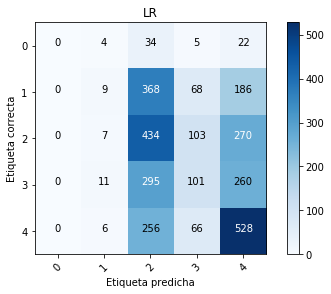

In [229]:
#Verifico cómo es la predicción de clases
plot_confusion_matrix(confusion_matrix(y_test_TRN, modeloLR.predict(X_test_MJR)), classes=[0,1,2,3,4], title='LR')

In [227]:
#Generamos un archivo para Kaggel con este modelo
dtset_tst['AdoptionSpeed']=modeloLR.predict(transformar(dtset_tst))

In [228]:
dtset_tst[ ['PID','AdoptionSpeed'] ].to_csv('kaggel/modeloLR.csv', index=False)

### Probamos DSG

In [230]:
#Entrenamos SDG con datos Originales
modeloSGDC = SGDClassifier(random_state=5)
modeloSGDC.fit(X_train, y_train) 

mostrar('Datos Mejorados', modeloSGDC, X_train, y_train,  X_test, y_test)

Datos Mejorados
Exactitud para TRAIN: 0.2197
Exactitud para TEST : 0.2151


In [233]:
#Entrenamos SDG con datos Normalizados
modeloSGDC = SGDClassifier(random_state=5)
modeloSGDC.fit(X_train_MM, y_train) 

mostrar('Datos Mejorados', modeloSGDC, X_train_MM, y_train,  sMM.transform(X_test), y_test)

Datos Mejorados
Exactitud para TRAIN: 0.2538
Exactitud para TEST : 0.2576


In [232]:
#Entrenamos SDG con datos Estandarizados
modeloSGDC = SGDClassifier(random_state=5)
modeloSGDC.fit(X_train_ST, y_train) 

mostrar('Datos Mejorados', modeloSGDC, X_train_ST, y_train, sST.transform(X_test), y_test)

Datos Mejorados
Exactitud para TRAIN: 0.2656
Exactitud para TEST : 0.2570


In [234]:
#Verifco con datos Mejorados (nuevos atributos)
#Entrenamos SDG con datos Estandarizados
modeloSGDC = SGDClassifier(random_state=5)
modeloSGDC.fit(X_train_MJR, y_train_MJR) 

mostrar('Datos Mejorados', modeloSGDC, X_train_MJR, y_train_MJR, X_test_MJR, y_test_MJR)

Datos Mejorados
Exactitud para TRAIN: 0.3639
Exactitud para TEST : 0.3541


In [235]:
#Buscamos mejores parámetros
exploring_params = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 
             'epsilon_insensitive', 'squared_epsilon_insensitive'], # Función de Pérdida
    'penalty': ['l2', 'l1', 'elasticnet'], #Coef Regularizacion
    'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],  # Tasa de regularización
    'learning_rate': ['constant','optimal','invscaling','adaptive'],
    'eta0': [1, 0.1, 0.01, 0.0001]  # Tasa de entrenamiento
}

modeloSGDC = SGDClassifier(random_state=5)
mBsqda = GridSearchCV(modeloSGDC, exploring_params, cv=5, scoring='accuracy')
mBsqda.fit(X_train_MJR, y_train_MJR)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=5, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05], 'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], 'eta0': [1, 0.1, 0.01, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [243]:
print("Mejor conjunto de parámetros:")
print(mBsqda.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = mBsqda.cv_results_['mean_test_score']
stds = mBsqda.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, mBsqda.cv_results_['params']):
    if mean > 0.362:
        print("Exactitud: %0.5f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
print()

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'invscaling', 'loss': 'epsilon_insensitive', 'penalty': 'l2'}

Puntajes de la grilla:

Exactitud: 0.36358 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'invscaling', 'loss': 'epsilon_insensitive', 'penalty': 'l2'}
Exactitud: 0.36245 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'invscaling', 'loss': 'modified_huber', 'penalty': 'elasticnet'}
Exactitud: 0.36330 (+/-0.000) para los parámetros {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'invscaling', 'loss': 'epsilon_insensitive', 'penalty': 'l2'}
Exactitud: 0.36302 (+/-0.000) para los parámetros {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'invscaling', 'loss': 'epsilon_insensitive', 'penalty': 'l2'}
Exactitud: 0.36274 (+/-0.000) para los parámetros {'alpha': 1e-05, 'eta0': 0.01, 'learning_rate': 'invscaling', 'loss': 'epsilon_insensitive', 'penalty': 'elasticnet'}



In [244]:
#Entrenamos SDG con los parámetros optimizados
modeloSGDC = SGDClassifier(random_state=5, **mBsqda.best_params_)
modeloSGDC.fit(X_train_MJR, y_train_MJR) 

mostrar('Datos Mejorados', modeloSGDC, X_train_MJR, y_train_MJR, X_test_MJR, y_test_MJR)

Datos Mejorados
Exactitud para TRAIN: 0.3639
Exactitud para TEST : 0.3577


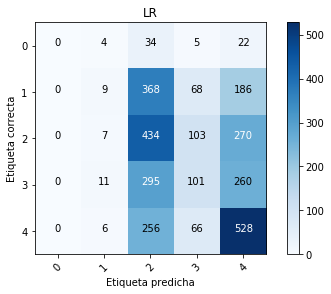

In [245]:
#Verifico cómo es la predicción de clases
plot_confusion_matrix(confusion_matrix(y_test_TRN, modeloLR.predict(X_test_MJR)), classes=[0,1,2,3,4], title='LR')

In [248]:
#Generamos un archivo para Kaggel con este modelo
dtset_tst['AdoptionSpeed']=modeloSGDC.predict(transformar(dtset_tst))

In [249]:
dtset_tst[ ['PID','AdoptionSpeed'] ].to_csv('kaggel/modeloSDG.csv', index=False)